<a href="https://colab.research.google.com/github/roboy88/Palantir-Stock-Data-Analysis/blob/main/Palantir_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Upload CSV with Palantir metadata
from google.colab import files
uploaded = files.upload()

# Load and preview
file_name = list(uploaded.keys())[0]
pltr_meta = pd.read_csv(file_name)
pltr_meta.head(10)


Saving Palantir_stock_info.csv to Palantir_stock_info.csv


,Key,Value
0,zip,80202
1,sector,Technology
2,fullTimeEmployees,2593
3,longBusinessSummary,Palantir Technologies Inc. builds and deploys ...
4,city,Denver
5,phone,720 358 3679
6,state,CO
7,country,United States
8,companyOfficers,[]
9,website,http://www.palantir.com


In [2]:
# Convert two-column CSV to dictionary
meta_dict = dict(zip(pltr_meta['Key'], pltr_meta['Value']))

# View main attributes
for k in ['sector', 'industry', 'website', 'longBusinessSummary']:
    print(f"{k.capitalize()}: {meta_dict.get(k, 'Not available')}\n")


Sector: Technology

Industry: Softwareâ€”Infrastructure

Website: http://www.palantir.com

Longbusinesssummary: Palantir Technologies Inc. builds and deploys software platforms for the intelligence community in the United States to assist in counterterrorism investigations and operations. The company provides Palantir Gotham, a software platform for government operatives in the defense and intelligence sectors, which enables users to identify patterns hidden deep within datasets, ranging from signals intelligence sources to reports from confidential informants, as well as facilitates the handoff between analysts and operational users, helping operators plan and execute real-world responses to threats that have been identified within the platform. It also offers Palantir Foundry, a platform that transforms the ways organizations operate by creating a central operating system for their data; and allows individual users to integrate and analyze the data they need in one place. Palantir Te

In [3]:
# Upload stock price CSV for Palantir
uploaded = files.upload()

# Read into DataFrame
stock_file = list(uploaded.keys())[0]
pltr_df = pd.read_csv(stock_file)
pltr_df['Date'] = pd.to_datetime(pltr_df['Date'])

# Preview the data
pltr_df.head()


Saving Palantir_stock_history.csv to Palantir_stock_history.csv


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-09-30,10.00,11.41,9.11,9.50,338584400,0,0
1,2020-10-01,9.69,10.10,9.23,9.46,124297600,0,0
2,2020-10-02,9.06,9.28,8.94,9.20,55018300,0,0
3,2020-10-05,9.43,9.49,8.92,9.03,36316900,0,0
4,2020-10-06,9.04,10.18,8.90,9.90,90864000,0,0


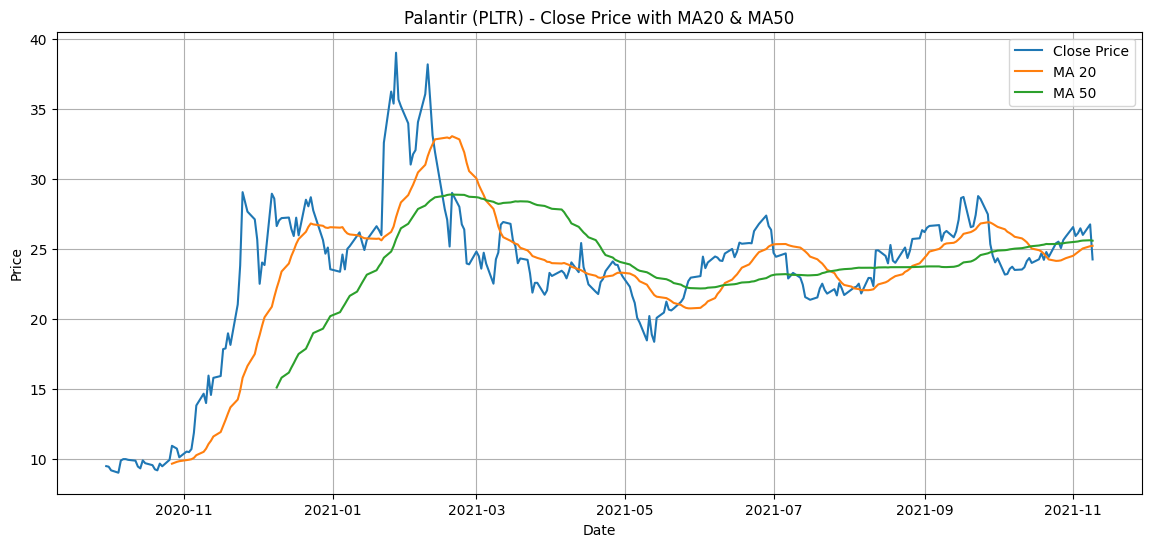

In [4]:
import matplotlib.pyplot as plt

# Sort by date
pltr_df = pltr_df.sort_values('Date')

# Calculate MA20 and MA50
pltr_df['MA20'] = pltr_df['Close'].rolling(window=20).mean()
pltr_df['MA50'] = pltr_df['Close'].rolling(window=50).mean()

# Plot
plt.figure(figsize=(14,6))
plt.plot(pltr_df['Date'], pltr_df['Close'], label='Close Price')
plt.plot(pltr_df['Date'], pltr_df['MA20'], label='MA 20')
plt.plot(pltr_df['Date'], pltr_df['MA50'], label='MA 50')
plt.title('Palantir (PLTR) - Close Price with MA20 & MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
# Volatility over 20-day rolling window
pltr_df['Volatility'] = pltr_df['Close'].rolling(window=20).std()

# Show tail with indicators
pltr_df[['Date', 'Close', 'MA20', 'MA50', 'Volatility']].tail()


,Date,Close,MA20,MA50,Volatility
276,2021-11-03,26.120001,24.771,25.5318,0.936297
277,2021-11-04,26.469999,24.908,25.5742,0.975595
278,2021-11-05,26.000000,25.033,25.5968,0.945388
279,2021-11-08,26.750000,25.194,25.6176,0.950127
280,2021-11-09,24.250000,25.222,25.5874,0.910914


In [6]:
# Install yfinance if needed
!pip install yfinance

# Import and download data
import yfinance as yf
import pandas as pd

# Download past 5 years of PLTR stock data
pltr_df = yf.download("PLTR", period="5y")

# Reset index to move 'Date' from index to column
pltr_df.reset_index(inplace=True)

# Preview the data
pltr_df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,PLTR,PLTR,PLTR,PLTR,PLTR
0,2020-09-30,9.50,11.41,9.11,10.00,338584400
1,2020-10-01,9.46,10.10,9.23,9.69,124297600
2,2020-10-02,9.20,9.28,8.94,9.06,55018300
3,2020-10-05,9.03,9.49,8.92,9.43,36316900
4,2020-10-06,9.90,10.18,8.90,9.04,90864000


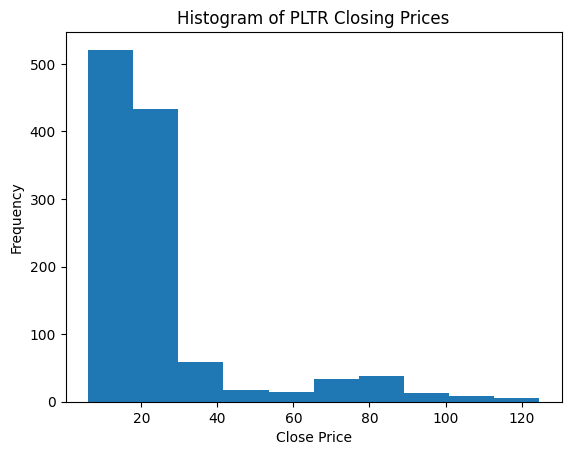

In [7]:
# prompt: Using dataframe pltr_df: histogram

import matplotlib.pyplot as plt
# Create the histogram
plt.hist(pltr_df['Close'], bins=10)  # Adjust the number of bins as needed

# Customize the plot (optional)
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title("Histogram of PLTR Closing Prices")

# Show the plot
plt.show()
